In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Objective

* The goal of this project is to analyze a dataset for malware detection and build machine learning models to classify systems as malware-infected or clean.
* I performed extensive data preprocessing, feature engineering, and model evaluation to achieve the best results.

# Loading Dataset

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load train & test datasets
train = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

# Display shape of datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (100000, 76)
Test shape: (10000, 75)


# Exploratory Data Analysis (EDA)

## Preview of Dataset

In [23]:
# Displays the first few rows of the dataset.

train.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


## Summary Statistics

In [24]:
# Summary statistics for numerical features
print("Explanation Statistics for Numerical Features:")
print(train.describe())

Explanation Statistics for Numerical Features:
       IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                     

**Explanation:** Provides Summary statistics like mean, standard deviation, min, and max values for numerical features. This helps identify missing values, outliers, and scale differences.


In [25]:
# Summary statistics for categorical features
print("Explanation Statistics for Categorical Features:")
print(train.describe(include=['object']))

Explanation Statistics for Categorical Features:
                               MachineID   ProductName EngineVersion  \
count                             100000        100000        100000   
unique                             99835             2            37   
top     8e0523438a5ca48323f50b2c47f6d31a  win8defender   1.1.15200.1   
freq                                   2         99771         45219   

             AppVersion SignatureVersion PlatformType Processor OSVersion  \
count            100000           100000       100000    100000    100000   
unique               69             2735            4         3         7   
top     4.18.1807.18075     1.273.1420.0    windows10       x64  10.0.0.0   
freq              62119             1274        98344     91262     98368   

       OsPlatformSubRelease                                OSBuildLab  ...  \
count                100000                                    100000  ...   
unique                    9                     

**Explanation:** Displays count, unique values, most frequent category (top), and frequency for categorical features. Useful for spotting high-cardinality features. Features with Low Variability (Single Dominant Value). 

In [26]:
# Training Data Columns Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

## Unique and Missing Value

In [27]:
# Check missing values
print(train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False))

SMode                                 981
CityID                                623
IsGamer                               559
RegionIdentifier                      559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
SystemVolumeCapacityMB                110
PrimaryDiskCapacityMB                 110
IEVersionID                           107
ProcessorModelID                       85
ProcessorManufacturerID                85
ProcessorCoreCount                     85
AntivirusConfigID                      76
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
NumAntivirusProductsInstalled     

In [28]:
# Count unique values in each column
unique_counts = train.nunique().sort_values(ascending=False)

# Select top 10 features with the highest unique values
top_10_unique_features = unique_counts.head(10)

# Display result
print("Top 10 Features with Highest Unique Values:")
print(top_10_unique_features)

Top 10 Features with Highest Unique Values:
MachineID                         99835
SystemVolumeCapacityMB            46188
CityID                            16047
OEMModelID                        15952
FirmwareVersionID                 12299
SignatureVersion                   2735
DateAS                             2695
AntivirusConfigID                  1976
InternalBatteryNumberOfCharges     1760
ProcessorModelID                   1659
dtype: int64


**Explanation:** Identifies high-cardinality features. Features with too many unique values may not be useful for OneHotEncoding and might require feature engineering.

## Outliers

In [29]:

# Function to detect outliers using IQR
def detect_outliers_iqr(df, threshold=1.5, limit=20):
    outlier_counts = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        clean_col = df[col].dropna()  # Remove NaN before computing IQR
        Q1 = clean_col.quantile(0.25)
        Q3 = clean_col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outliers = clean_col[(clean_col < lower_bound) | (clean_col > upper_bound)]
        outlier_counts.append((col, len(outliers)))  # Store as tuple

    # Convert to DataFrame and sort
    outlier_df = pd.DataFrame(outlier_counts, columns=['Feature', 'Outlier_Count'])
    outlier_df = outlier_df.sort_values(by='Outlier_Count', ascending=False).reset_index(drop=True)

    return outlier_df.head(limit)

# Run function on dataset
outliers_df = detect_outliers_iqr(train, limit=20)
print("Number of outliers per column (Descending Order):")
print(outliers_df)


Number of outliers per column (Descending Order):
                             Feature  Outlier_Count
0                  AntivirusConfigID          19581
1                      OSBuildNumber          15982
2                  OSBuildNumberOnly          15449
3                OSBuildRevisionOnly          14258
4                     IsTouchEnabled          12847
5            ProcessorManufacturerID          11735
6                 ProcessorCoreCount          11142
7                   ProcessorModelID          10931
8       PrimaryDisplayDiagonalInches          10749
9                          OEMNameID          10270
10               HasOpticalDiskDrive           8140
11                TotalPhysicalRAMMB           7094
12  IsAlwaysOnAlwaysConnectedCapable           5832
13                       IEVersionID           4949
14                 IsSystemProtected           4464
15                      IsPenCapable           4058
16           RealTimeProtectionState           2559
17       NumAn

**Explanation :**  Outliers are extreme values that deviate significantly from the rest of the data. This analysis uses Interquartile Range (IQR) to detect them and lists the top 20 features with the highest number of outliers. It helps decide whether to handle outliers via transformation or removal.

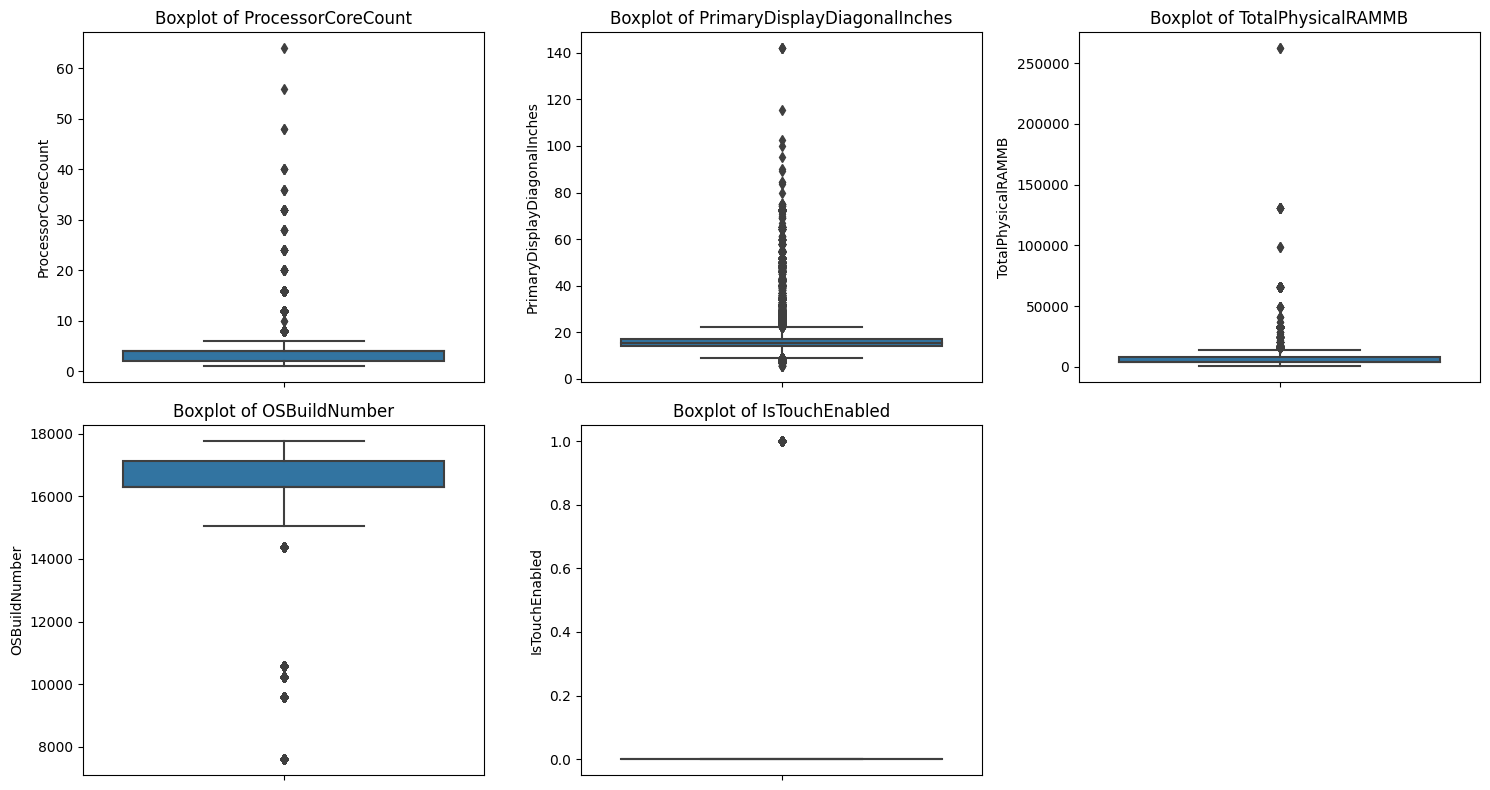

In [30]:
#visualization of Some columns which contains Outliers

# Selected features to visualize
selected_features = ['ProcessorCoreCount', 'PrimaryDisplayDiagonalInches', 
                     'TotalPhysicalRAMMB', 'OSBuildNumber', 'IsTouchEnabled']

# Create boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Explanation :** Outliers appear as points outside the "whiskers" of the boxplot.


## Skewness

In [31]:
# Select only numerical columns
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Compute skewness for each numerical feature
skewness = train[numeric_cols].skew().sort_values(ascending=False)

# Display skewness
print("\nSkewness of Numerical Features:")
print(skewness)


Skewness of Numerical Features:
EnableLUA                             164.066029
SMode                                  44.468420
IsPortableOS                           43.819346
IsVirtualDevice                        16.042947
TotalPhysicalRAMMB                      7.919121
IsPassiveModeEnabled                    7.333024
NumAntivirusProductsEnabled             5.548920
PrimaryDisplayDiagonalInches            5.347827
OSBuildRevisionOnly                     5.181163
IsPenCapable                            4.656783
IsAlwaysOnAlwaysConnectedCapable        3.766463
ProcessorCoreCount                      3.437473
IEVersionID                             3.350552
HasOpticalDiskDrive                     3.061684
PrimaryDisplayResolutionVertical        2.778362
PrimaryDisplayResolutionHorizontal      2.428542
IsTouchEnabled                          2.220692
SystemVolumeCapacityMB                  1.623561
NumAntivirusProductsInstalled           1.320539
PrimaryDiskCapacityMB               

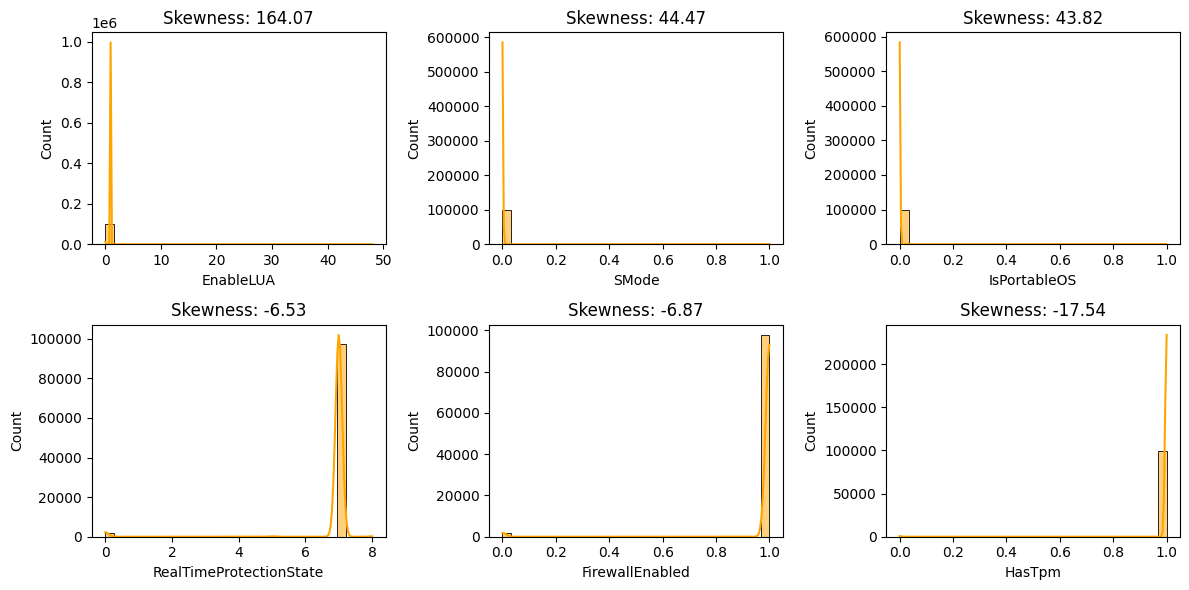

In [40]:
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Get top 3 positively and top 3 negatively skewed features
top_positive_skew = skewness.head(3)  # Highest positive skew
top_negative_skew = skewness.tail(3)  # Highest negative skew

# Combine both
top_features = pd.concat([top_positive_skew, top_negative_skew])

# Set figure size
plt.figure(figsize=(12, 6))

# Plot each feature in a subplot
for i, feature in enumerate(top_features.index, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    
    # Check if the feature has valid numerical data before plotting
    if train[feature].dtype in ['int64', 'float64']:  
        sns.histplot(train[feature].dropna(), kde=True, bins=30, color='orange')
        plt.title(f'Skewness: {top_features[feature]:.2f}')
        plt.xlabel(feature)
    else:
        plt.title(f"{feature}: Non-Numeric or Invalid Data")
        plt.axis("off")  # Hide axes for invalid plots

plt.tight_layout()
plt.show()

In [37]:
# List of top positively and negatively skewed features
highly_skewed_features = top_features.index.tolist()

# Compute correlation with target
corr_with_target = train[highly_skewed_features + ['target']].corr()['target'].drop('target')

# Display correlation values
print(corr_with_target)


EnableLUA                 -0.001928
SMode                     -0.015559
IsPortableOS               0.006779
RealTimeProtectionState    0.049012
FirewallEnabled            0.010266
HasTpm                     0.007658
Name: target, dtype: float64


**Explanation :** Drop Features with Very Low Correlation. To fix skewness, apply log transformation or power transformation.


## Feature Correlation

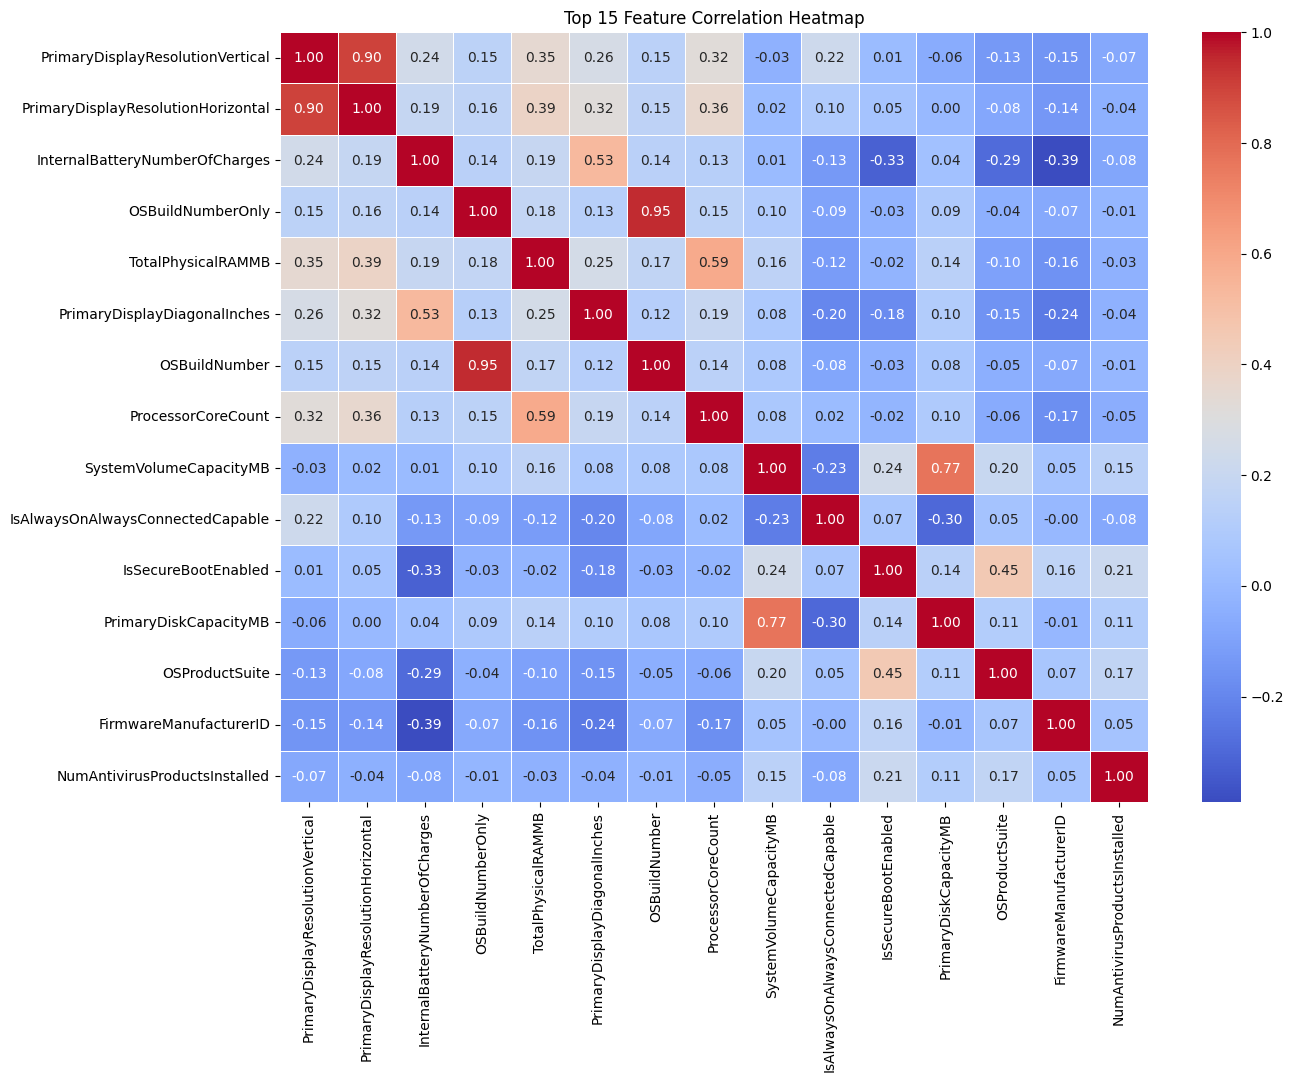

In [12]:
#Top 15 Feature Correlation

# Suppress Matplotlib Warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Select only numerical columns (Avoid Categorical Column Errors)
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train[numeric_cols].corr()

# Select only the top 15 most correlated features to avoid clutter
top_corr_features = corr_matrix.abs().mean().sort_values(ascending=False).index[:15]
filtered_corr_matrix = corr_matrix.loc[top_corr_features, top_corr_features]

# Plot heatmap with optimized size
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Top 15 Feature Correlation Heatmap")
plt.show()


**Explanation :** Feature correlation helps us understand relationships between variables. If two features are highly correlated, one might be redundant. Pearson Correlation (corr()) is commonly used to measure correlation.Values range from -1 to +1. 

* 0 - No correlation.
* +1 - Strong positive correlation (both increase together).
* -1 - Strong negative correlation (one increases, the other decreases).

## Visualization (Num, Cat & Target)

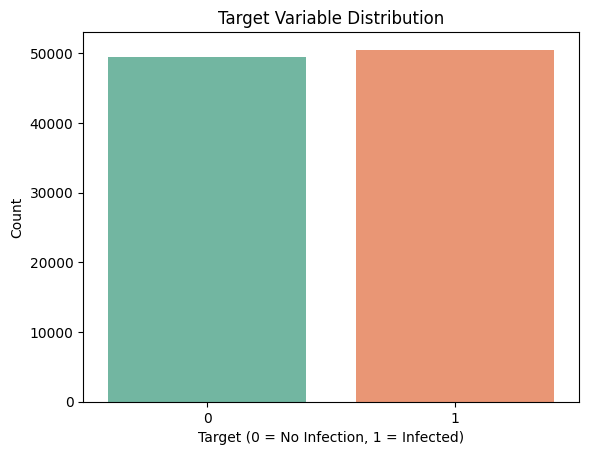

target
1    0.50525
0    0.49475
Name: proportion, dtype: float64


In [13]:
# Check target variable distribution
sns.countplot(x=train['target'], palette="Set2")
plt.title("Target Variable Distribution")
plt.xlabel("Target (0 = No Infection, 1 = Infected)")
plt.ylabel("Count")
plt.show()
print(train['target'].value_counts(normalize=True))

**Explanation :** The bar chart shows that the dataset is balanced, meaning there are almost equal counts of infected (1) and non-infected (0) systems.
This means that the dataset does not suffer from class imbalance.

### Importance of features

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Copy dataset and replace infinite values with NaN
train_encoded = train.copy()
train_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate numerical and categorical features
num_features = train_encoded.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
cat_features = train_encoded.select_dtypes(include=['object']).columns.tolist()

# Fill missing values
num_imputer = SimpleImputer(strategy='median')  # Median for numerical features
train_encoded[num_features] = num_imputer.fit_transform(train_encoded[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical features
train_encoded[cat_features] = cat_imputer.fit_transform(train_encoded[cat_features])

# Encode categorical features
for col in cat_features:
    train_encoded[col] = LabelEncoder().fit_transform(train_encoded[col])

# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(train_encoded.drop(columns=['target', 'MachineID']), train_encoded['target'])

# Get feature importance
feature_importance = rf_model.feature_importances_

# Rank features by importance
importance_df = pd.DataFrame({'Feature': train_encoded.drop(columns=['target', 'MachineID']).columns, 
                              'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Select high and low importance features
high_important_num = importance_df[importance_df['Feature'].isin(num_features)].head(10)['Feature'].tolist()
low_important_num = importance_df[importance_df['Feature'].isin(num_features)].tail(10)['Feature'].tolist()
high_important_cat = importance_df[importance_df['Feature'].isin(cat_features)].head(10)['Feature'].tolist()
low_important_cat = importance_df[importance_df['Feature'].isin(cat_features)].tail(10)['Feature'].tolist()

# Display results
print("High Important Numerical Features:", high_important_num, "\n")
print("Low Important Numerical Features:", low_important_num, "\n")
print("High Important Categorical Features:", high_important_cat, "\n")
print("Low Important Categorical Features:", low_important_cat, "\n")


High Important Numerical Features: ['CityID', 'SystemVolumeCapacityMB', 'FirmwareVersionID', 'OEMModelID', 'ProcessorModelID', 'CountryID', 'GeoRegionID', 'LocaleEnglishNameID', 'PrimaryDisplayDiagonalInches', 'AntivirusConfigID'] 

Low Important Numerical Features: ['IsAlwaysOnAlwaysConnectedCapable', 'IsPassiveModeEnabled', 'IsVirtualDevice', 'EnableLUA', 'HasTpm', 'SMode', 'IsPortableOS', 'IsFlightsDisabled', 'AutoSampleSubmissionEnabled', 'IsBetaUser'] 

High Important Categorical Features: ['DateAS', 'SignatureVersion', 'NumericOSVersion', 'DateOS', 'OSInstallType', 'AppVersion', 'ChassisType', 'OSBuildLab', 'AutoUpdateOptionsName', 'LicenseActivationChannel'] 

Low Important Categorical Features: ['PowerPlatformRole', 'OSGenuineState', 'SKUEditionName', 'FlightRing', 'Processor', 'OSArchitecture', 'OSVersion', 'PlatformType', 'ProductName', 'DeviceFamily'] 



**Explanation :** Random Forest works well for both linear & non-linear data. Random Forest assigns an importance score to each feature based on how useful it is for making predictions. This is determined using Gini impurity or Mean Decrease in Impurity (MDI).

Gini impurity measures how "impure" a node is in a Decision Tree.
* If all data points in a node belong to the same class, impurity = 0 (pure node).
* If data is split evenly between classes, impurity is highest.
  
Mathematical Representation:

G=1−∑pi^2 , (pi = probability of a data point belonging to class i)

Feature Importance = ∑(Gini Before Split − Gini After Split) × Samples at Node


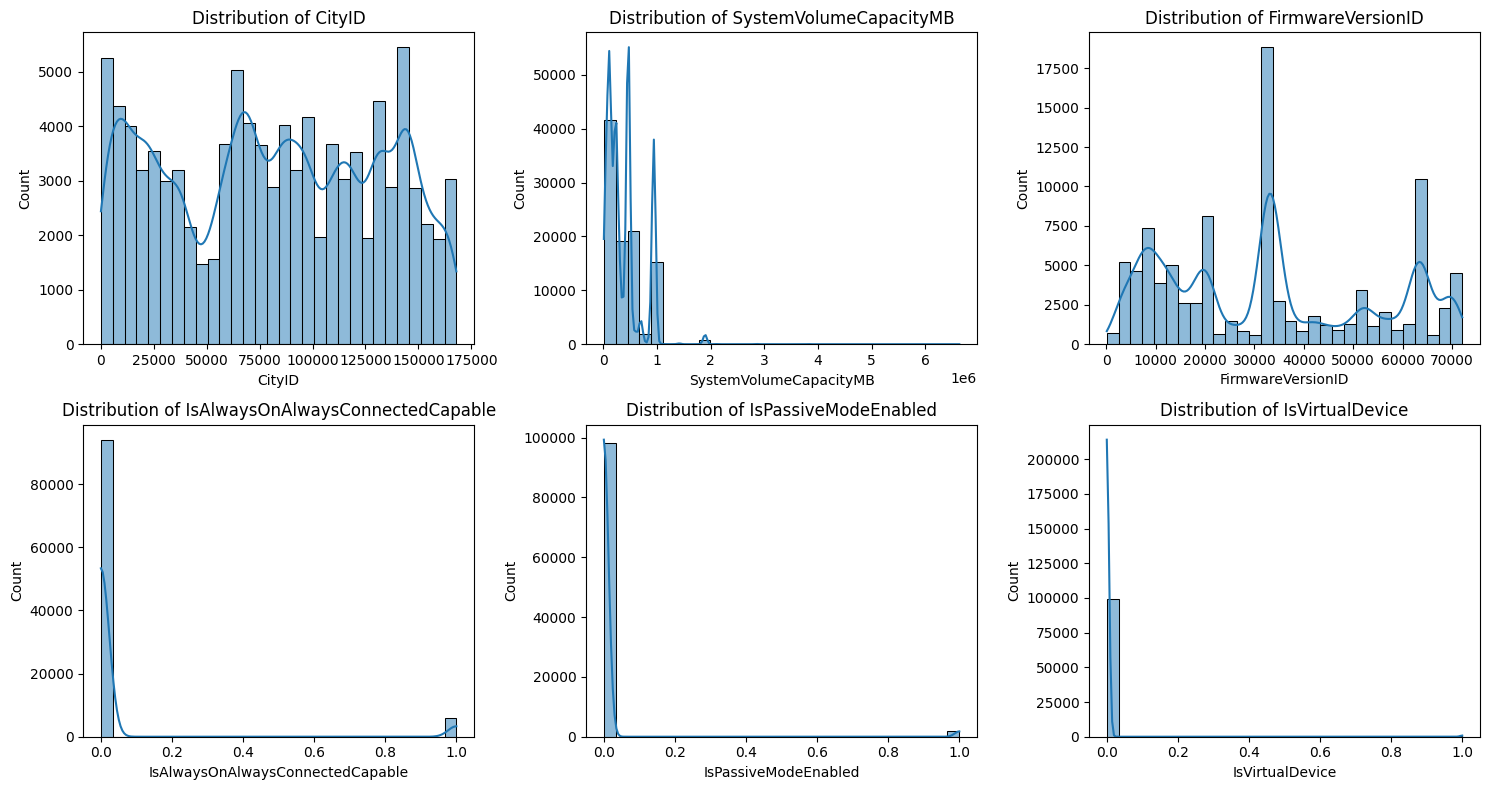

In [15]:
#Numerical Features

# Select 3 high-importance & 3 low-importance numerical features
selected_num_features = high_important_num[:3] + low_important_num[:3]

# Plot histograms for selected numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_num_features):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns grid
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


**Explanation :** Visualizes the distribution and spread of important numerical features, highlighting potential outliers and skewness in the data.
The high-importance numerical features (CityID, SystemVolumeCapacityMB, FirmwareVersionID) show distinct patterns, such as multi-modal distributions or strong skews, indicating clear separations useful for classification. In contrast, low-importance numerical features (IsAlwaysOnAlwaysConnectedCapable, IsPassiveModeEnabled, IsVirtualDevice) are highly imbalanced, with most values concentrated in a single category, making them less informative. 

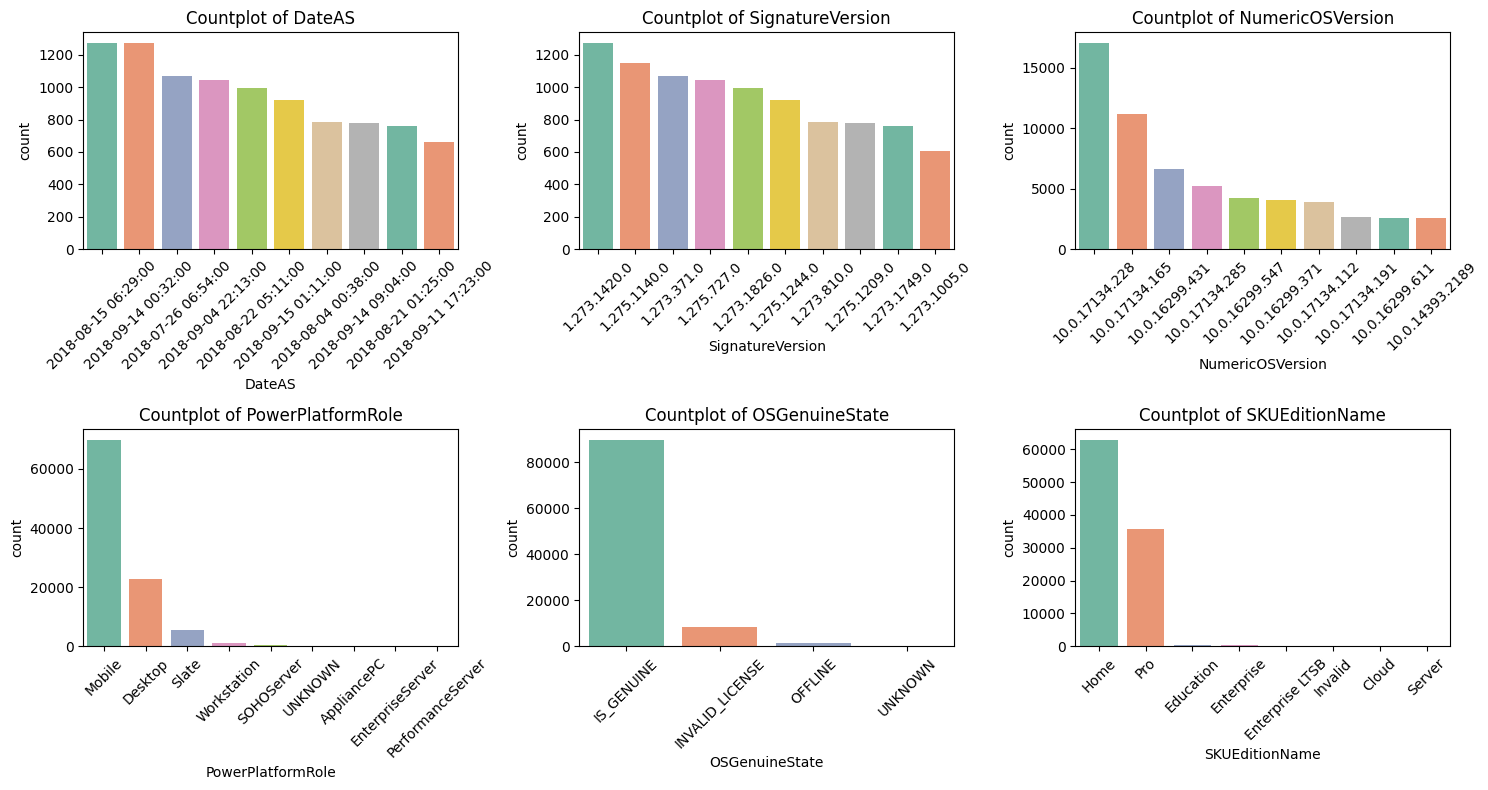

In [16]:
# Categorical Features

# Select 3 high-importance & 3 low-importance categorical features
selected_cat_features = high_important_cat[:3] + low_important_cat[:3]

plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_cat_features):
    plt.subplot(2, 3, i + 1)
    
    # Limit to top 10 categories for high-cardinality features
    top_categories = train[col].value_counts().nlargest(10).index
    sns.countplot(x=train[col], order=top_categories, palette="Set2")
    
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

**Explanation :** Displays the distribution of categorical features. Helps identify dominant categories and potential encoding strategies.

High-importance categorical features (DateAS, SignatureVersion, NumericOSVersion) exhibit category imbalances that highlight specific dates, OS versions, or AV signature updates as key indicators of infection risk. Meanwhile, low-importance categorical features (PowerPlatformRole, OSGenuineState, SKUEditionName) have dominant categories with little variation, offering minimal predictive power. 

# Feature Engineering

In [17]:
#Copy of Data
train_fe=train.copy()

# Convert date columns to datetime format
train_fe['DateAS'] = pd.to_datetime(train_fe['DateAS'])
train_fe['DateOS'] = pd.to_datetime(train_fe['DateOS'])

# Create new features
train_fe['days_active'] = (train_fe['DateAS'] - train_fe['DateOS']).dt.days

train_fe['AS_year'] = train_fe['DateAS'].dt.year
train_fe['OS_year'] = train_fe['DateOS'].dt.year

train_fe['AS_month'] = train_fe['DateAS'].dt.month
train_fe['OS_month'] = train_fe['DateOS'].dt.month


# Add interaction features
train_fe['days_active_x_AS_month'] = train_fe['days_active'] * train_fe['AS_month']
train_fe['OS_year_x_AS_month'] = train_fe['OS_year'] * train_fe['AS_month']

#drop date columns
train_fe.drop(columns=[ 'DateAS', 'DateOS'], inplace=True)

**Explanation :** Feature engineering helps improve model performance by creating more informative features from raw data. In this case, transforming date columns into numerical values and interaction features allows the model to capture time-based patterns and system activity trends, which may help predict system infections more accurately. Transformation aimed to extract meaningful information from DateAS and DateOS.

**In cybersecurity, time-based trends are important (e.g., frequent malware infections in certain periods).**

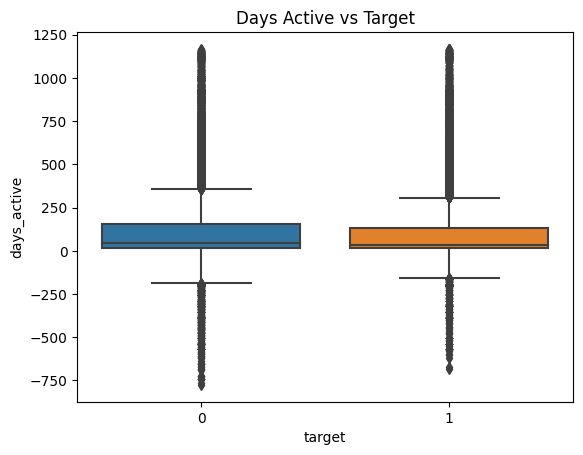

In [18]:
sns.boxplot(x=train_fe["target"], y=train_fe["days_active"])
plt.title("Days Active vs Target")
plt.show()

**Explanation :** No clear separation, meaning it’s not a strong predictor.
days_active doesn’t differentiate malware-infected (1) vs. non-infected (0) systems. No clear separation, meaning it’s not a strong predictor

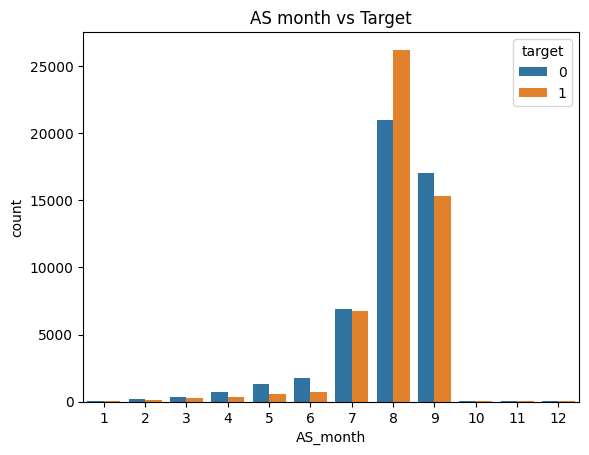

In [19]:
sns.countplot(x=train_fe["AS_month"], hue=train_fe["target"])
plt.title("AS month vs Target")
plt.show()

**Explanation :**  Most activations happen in July, August, September. Malware infections are proportionally similar, meaning no clear predictive pattern.

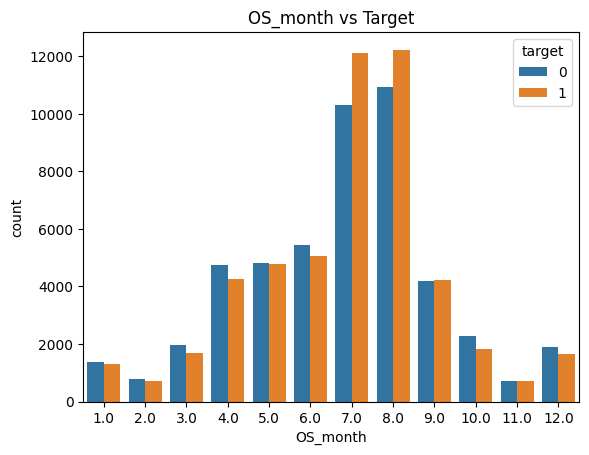

In [20]:
sns.countplot(x=train_fe["OS_month"], hue=train_fe["target"])
plt.title("OS_month vs Target")
plt.show()

**Explanation :** Distribution is spread across months, with no major difference in infection trends.

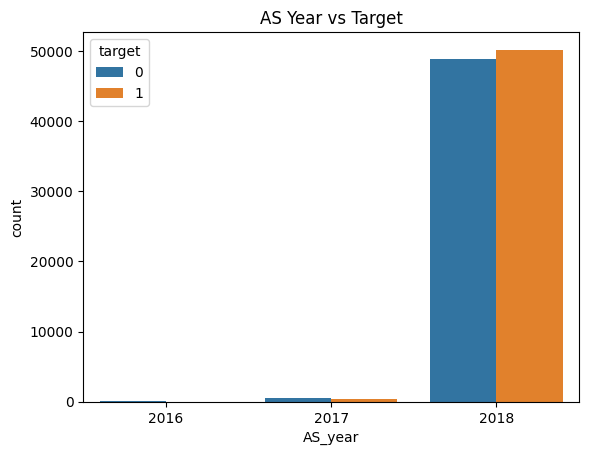

In [21]:
sns.countplot(x=train_fe["AS_year"], hue=train_fe["target"])
plt.title("AS Year vs Target")
plt.show()

**Explanation :** Most activations happen in 2018, but malware infections follow a similar trend as non-infected systems.

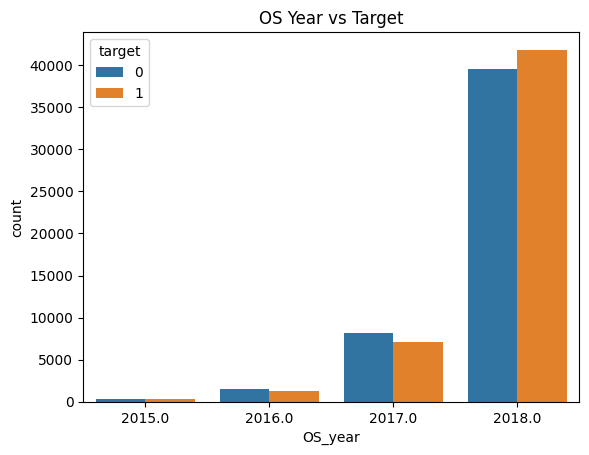

In [22]:
sns.countplot(x=train_fe["OS_year"], hue=train_fe["target"])
plt.title("OS Year vs Target")
plt.show()

**Explanation :** Older OS versions (2015-2017) have fewer samples, but malware rates are proportionally similar.

In [23]:
corr_matrix = train_fe[["days_active", "AS_month", "OS_month", "AS_year","OS_year", 
                      "days_active_x_AS_month", "OS_year_x_AS_month", "target"]].corr()
print(corr_matrix["target"].sort_values(ascending=False))

target                    1.000000
OS_year_x_AS_month        0.045511
AS_month                  0.045492
OS_year                   0.033973
AS_year                   0.026276
OS_month                  0.011903
days_active_x_AS_month   -0.019951
days_active              -0.024599
Name: target, dtype: float64


**Explanation :** Correlation analysis shows these features contribute little to model performance.

Feature engineering helped capture temporal trends, with AS_month and OS_year showing some impact on infections. However, days_active had minimal influence, as seen in the boxplot and low correlation (-0.0246). Interaction features like OS_year_x_AS_month had weak correlations (~0.045), indicating limited predictive power. Since the original date columns were retained, the model still had access to raw time-based patterns. While the new features provide better interpretability, their weak correlation suggests they might not significantly improve model accuracy. More advanced transformations (e.g., categorical encoding of months) or external data might be required for better feature utility.

#  Train-Validation Split (80:20)

In [24]:
from sklearn.model_selection import train_test_split

# Other Feature to drop from 'IsBetaUser','IsPassiveModeEnabled','PlatformType','ProductName',
#'EnableLUA', 'IsPortableOS', 'SMode', 'HasTpm'
#'DateAS', 'DateOS','CityID', 'OEMModelID','FirmwareVersionID'

# Drop original date columns
train.drop(columns=['MachineID'], inplace=True)
test.drop(columns=['MachineID'], inplace=True)

# Separate features and target

X = train.drop(columns=['target']) 
y = train['target']

# 80% Training, 20% Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_valid.shape)

Training Set Shape: (80000, 74)
Validation Set Shape: (20000, 74)


**Explanation :** Dataset was split into training (80%) and validation (20%), ensuring stratification to maintain the original class distribution.
Since malware detection is a classification task, stratifying ensures that the proportion of 0 (non-infected) and 1 (infected) remains consistent in both train and validation sets.

# Data Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold

# Identify feature types
num_features = X_train.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Remove constant/near-constant numerical features BEFORE preprocessing
var_thresh = VarianceThreshold(threshold=1e-5)
X_train_num_var = var_thresh.fit_transform(X_train[num_features])
X_valid_num_var = var_thresh.transform(X_valid[num_features])
X_test_num_var = var_thresh.transform(test[num_features])

# Keep track of selected numerical feature names
num_selected_features = [num_features[i] for i in range(len(num_features)) if var_thresh.variances_[i] > 1e-5]

# Updated feature lists after VarianceThreshold
num_features = num_selected_features  # Only keep non-constant numerical features

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),  # Normalize values (can use robust scaler which is not affected by outliers)
    ('power_transform', PowerTransformer(method='yeo-johnson'))  # Fix skewness
])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Convert categorical to numerical
])
# ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('power_transform',
                                                  PowerTransformer())]),
                                 ['RealTimeProtectionState',
                                  'IsPassiveModeEnabled', 'AntivirusConfigID',
                                  'NumAntivirusProductsInstalled',
                                  'NumAntivirusProductsEnabled', 'HasTpm',
                                  'CountryID', 'CityID', 'GeoRegionID',
                                  'Loca...
                                  'Processor', 'OSVersion',
                                  'OsPlatformSubRelease', 'OSBuildLab',
                                  'SKUEditionName', 'MDC2FormFactor',
                                  'DeviceFamily', 'PrimaryDiskType',
                                  'ChassisType', 'PowerPlatformRole',
                                  'NumericOSVersion', 'OSArchitecture',
                                  'OSBranch', 'OSEdition', 'OSSkuFriendlyName',
                                  'OSInstallType', 'AutoUpdateOptionsName',
                                  'OSGenuineState', 'LicenseActivationChannel',
                                  'FlightRing', 'DateAS', 'DateOS'])])

In [26]:
# Apply transformation
X_train_tf = preprocessor.fit_transform(X_train)
X_valid_tf = preprocessor.transform(X_valid)
X_test_tf = preprocessor.transform(test)

print("X_train_transformed:", X_train_tf.shape)
print("X_valid_transformed:", X_valid_tf.shape)
print("X_test_transformed:", X_test_tf.shape)

X_train_transformed: (80000, 71)
X_valid_transformed: (20000, 71)
X_test_transformed: (10000, 71)


**Explanation :**  The preprocessing pipeline first removes low-variance numerical features using VarianceThreshold, ensuring only informative features remain. Numerical features undergo missing value imputation (median), scaling (StandardScaler) for normalization, and PowerTransformer (Yeo-Johnson) to correct skewness. Categorical features are processed using most frequent imputation and Ordinal Encoding, which assigns numeric values while handling unknown categories. A ColumnTransformer then combines these pipelines, applying transformations to numerical and categorical features separately. Finally, the preprocessor is fitted on training data and applied to validation and test sets, ensuring consistency across datasets.

**Explanation :** Feature selection is useful when:

* Too many irrelevant or redundant features - Causes overfitting & slows training.
* High-dimensional data (e.g., 500+ features) - Reduces complexity.
* Curse of dimensionality affecting model performance - Prevents overfitting.
* Improving model interpretability - Focuses on important features.


# Model Training & Compare

## Logistic Regression

Logistic Regression Accuracy: 0.60235
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      9895
           1       0.59      0.67      0.63     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



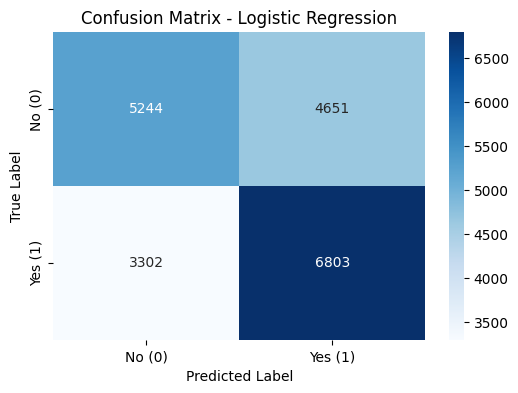

In [28]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

lr = LogisticRegression(max_iter=2000, solver='saga', random_state=42)
lr.fit(X_train_tf, y_train)

# Predict on Validation Data
y_pred_lr = lr.predict(X_valid_tf)

# Evaluate Model
print("Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred_lr))
print("Logistic Regression - Classification Report:")
print(classification_report(y_valid, y_pred_lr))

# Compute Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_lr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Explanation :**
The model achieves around 60% accuracy, indicating it correctly predicts infection status in just over half the cases. From the classification report, we see class 1 (infected) has higher recall (0.67) but slightly lower precision (0.59), suggesting it catches more true positives but also misclassifies some negatives as positives. Meanwhile, class 0 (not infected) has lower recall (0.53), meaning it misses nearly half of the true negatives. The confusion matrix reflects this trade-off, with a notable number of false positives and false negatives. Overall, the logistic regression model is capturing some signal but may benefit from additional features or tuning to improve predictive power.

## SGD model

SGD Accuracy: 0.4951
SGD - Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      9895
           1       0.54      0.00      0.01     10105

    accuracy                           0.50     20000
   macro avg       0.52      0.50      0.34     20000
weighted avg       0.52      0.50      0.33     20000



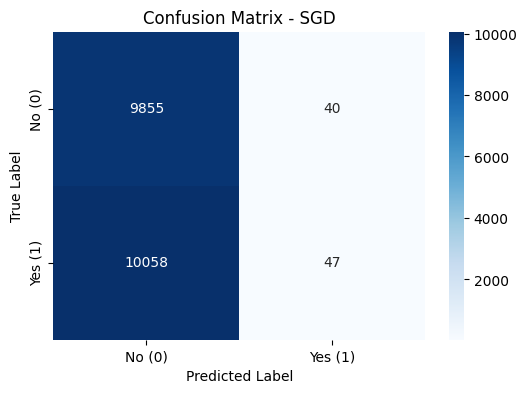

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Train SGDClassifier (Approximates Linear SVM)
sgd_model = SGDClassifier(loss='hinge', alpha=0.01, max_iter=1000, random_state=42)
sgd_model.fit(X_train_tf, y_train)

# Predict on Validation Data
y_pred_sgd = sgd_model.predict(X_valid_tf)

# Evaluate Model
print("SGD Accuracy:", accuracy_score(y_valid, y_pred_sgd))
print("SGD - Classification Report:")
print(classification_report(y_valid, y_pred_sgd))


# Compute Confusion Matrix for SVM
cm_sgd = confusion_matrix(y_valid, y_pred_sgd)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sgd, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SGD")
plt.show()


**Explanation :** The SGD model performs poorly, achieving only 49.51% accuracy, which is worse than random guessing. The classification report shows class 0 (No Infection) dominates predictions, with recall 1.00 but low precision (0.49), meaning nearly all predictions are biased toward class 0. Class 1 (Infected) is almost ignored, with a recall of just 0.01, making it ineffective for detecting infections. The confusion matrix confirms this, with 10,058 false negatives, showing the model struggles to identify infected systems.

## Support Vector Machine (SVM)

SVM Accuracy: 0.5434
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.39      0.46      9895
           1       0.54      0.69      0.60     10105

    accuracy                           0.54     20000
   macro avg       0.55      0.54      0.53     20000
weighted avg       0.55      0.54      0.53     20000



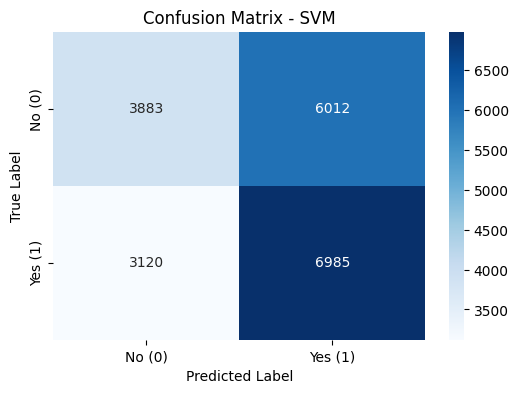

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Train Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)  # Linear SVM
svm_model.fit(X_train_tf, y_train)

# Predict on Validation Data
y_pred_svm = svm_model.predict(X_valid_tf)

# Evaluate Model
print("SVM Accuracy:", accuracy_score(y_valid, y_pred_svm))
print("SVM - Classification Report:")
print(classification_report(y_valid, y_pred_svm))

# Compute Confusion Matrix for SVM
cm_svm = confusion_matrix(y_valid, y_pred_svm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


**Explanation :** SVM performs better than SGD but worse than Logistic Regression (60.2% vs 54.3%).
Detects malware well (69% recall for Class 1) but misclassifies many clean systems.

## LightGBM

LightGBM Accuracy: 0.6298
LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      9895
           1       0.62      0.68      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



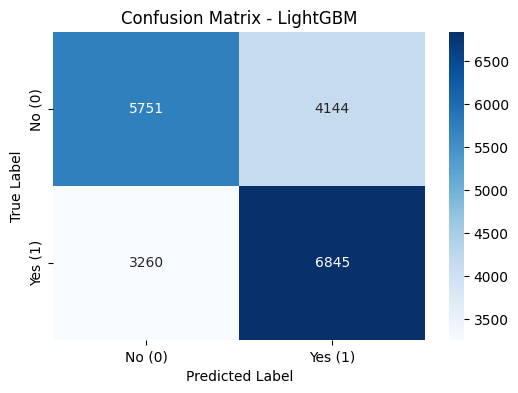

In [31]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

# Train LightGBM model
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, class_weight='balanced', random_state=42, verbose=-1)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tf, y_train)

# train on balanced data
lgbm.fit(X_train_balanced, y_train_balanced)


# Predict on Validation Data
y_pred_lgbm = lgbm.predict(X_valid_tf)

# Evaluate Model
print("LightGBM Accuracy:", accuracy_score(y_valid, y_pred_lgbm))
print("LightGBM - Classification Report:")
print(classification_report(y_valid, y_pred_lgbm))


# Compute Confusion Matrix for LightGBM
cm_lgbm = confusion_matrix(y_valid, y_pred_lgbm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM")
plt.show()

**Explanation :** Best Accuracy So Far (62.98%) → Better than Logistic Regression and SVM .
Recall for Class 1 (Malware) is 68% → Better at detecting Malware than SVM (69%) and Logistic Regression (67%). Balanced Recall (58% for No Malware, 68% for Malware). Balances both Precision & Recall → More reliable than previous models. Still room for improvement with tuning & feature engineering.

## XGBoost

XGBoost Accuracy: 0.62865
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      9895
           1       0.62      0.68      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



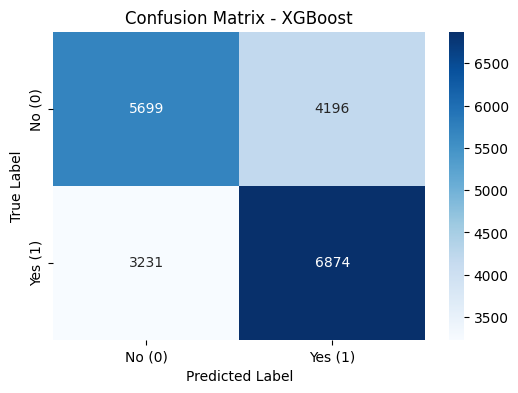

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train_tf, y_train)

# Predict on Validation Data
y_pred_xgb = xgb.predict(X_valid_tf)

# Evaluate Model
print("XGBoost Accuracy:", accuracy_score(y_valid, y_pred_xgb))
print("XGBoost - Classification Report:")
print(classification_report(y_valid, y_pred_xgb))

from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_valid, y_pred_xgb)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

**Explanation :** Accuracy = 0.62865, showing decent performance similar to LightGBM.
Precision & Recall: The model balances both classes well, with Recall (0.68 for class 1) being slightly higher, meaning it detects infected systems well. More False Positives than False Negatives, meaning the model is conservative in predicting infections. Compared to Logistic Regression, XGBoost shows higher recall (better at catching malware).

# Hyperparameter Tuning

## LightGBM Tunning

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best LightGBM Parameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 1.0, 'num_leaves': 20, 'n_estimators': 800, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.03593813663804626, 'colsample_bytree': 0.6}
Tuned LightGBM Accuracy: 0.6304
Tuned LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9895
           1       0.63      0.67      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



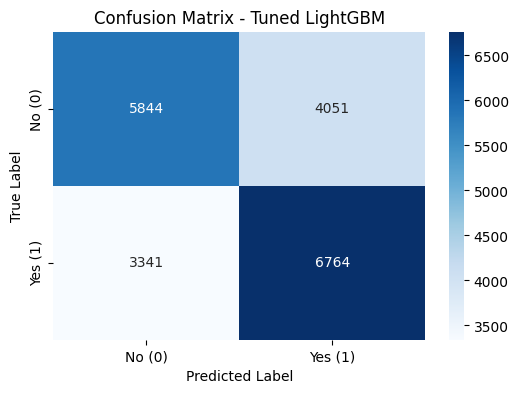

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
# Define parameter grid for LightGBM
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of boosting rounds
    'learning_rate': np.logspace(-3, -1, 10),  # Log scale for better granularity
    'max_depth': [3, 5, 7, 9],  # Removed `-1` (unlimited depth can cause overfitting)
    'num_leaves': np.arange(20, 150, 10),  # Limited upper bound to prevent overfitting
    'min_child_samples': [5, 10, 20, 30, 50],  # More granularity
    'colsample_bytree': np.linspace(0.6, 1.0, 5),  # Slightly increased lower bound
    'subsample': np.linspace(0.6, 1.0, 5),  # Slightly increased lower bound
    'reg_alpha': np.linspace(0, 1, 5),  # L1 regularization (reduces overfitting)
    'reg_lambda': np.linspace(0, 1, 5)  # L2 regularization (reduces overfitting)
}

# Initialize LightGBM model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=lgbm, param_distributions=param_dist, n_iter=30,  # Number of random configurations to try
    scoring='accuracy', cv=5, verbose=1,random_state=42, n_jobs=-1  # Parallel processing
)

# Fit Random Search
random_search.fit(X_train_tf, y_train)

# Best parameters
print("Best LightGBM Parameters:", random_search.best_params_)

# Use best model for further training
best_lgbm = random_search.best_estimator_

# Evaluate tuned model
best_lgbm.fit(X_train_tf, y_train)
y_valid_pred_tuned_lgbm = best_lgbm.predict(X_valid_tf)
print("Tuned LightGBM Accuracy:", accuracy_score(y_valid, y_valid_pred_tuned_lgbm))
print("Tuned LightGBM - Classification Report:")
print(classification_report(y_valid, y_valid_pred_tuned_lgbm))


# Compute Confusion Matrix for Tuned LightGBM
cm_tuned_lgbm = confusion_matrix(y_valid, y_valid_pred_tuned_lgbm)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_lgbm, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned LightGBM")
plt.show()

**Explanation :**  Accuracy improved slightly from 0.6298 → 0.6304.
No major change in precision.  Recall (0.59 for Class 0, 0.67 for Class 1) - Slight improvement for detecting malware (Class 1). Balanced tradeoff between precision & recall. Tuning helped control overfitting, but the dataset may have feature redundancy.

## XGBoost Tunning

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best XGBoost Parameters: {'subsample': 0.6, 'reg_lambda': 0.25, 'reg_alpha': 1.0, 'n_estimators': 800, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.03593813663804626, 'gamma': 0.0, 'colsample_bytree': 0.6}
Tuned XGBoost Accuracy: 0.62685
Tuned XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



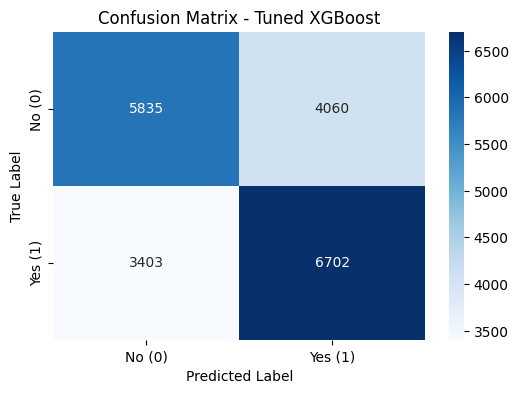

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter grid for XGBoost
param_dist_xgb = {
    'n_estimators': np.arange(100, 1000, 100),  # Boosting rounds
    'learning_rate': np.logspace(-3, -1, 10),  # Log scale (0.001 to 0.1)
    'max_depth': [3, 5, 7],  # Prevent overfitting
    'min_child_weight': [1, 3, 5, 10],  # Control splits
    'gamma': np.linspace(0, 5, 5),  # Minimum loss reduction for splits
    'colsample_bytree': np.linspace(0.6, 1.0, 5),  # Feature sampling
    'subsample': np.linspace(0.6, 1.0, 5),  # Row sampling
    'reg_alpha': np.linspace(0, 1, 5),  # L1 regularization
    'reg_lambda': np.linspace(0, 1, 5)  # L2 regularization
}

# Initialize XGBoost model
xgb = XGBClassifier(random_state=42)

# Perform Randomized Search for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb, param_distributions=param_dist_xgb, n_iter=30, scoring='accuracy', 
    cv=3, verbose=1, random_state=42, n_jobs=-1
)

# Fit Random Search
random_search_xgb.fit(X_train_tf, y_train)

# Best parameters for XGBoost
print("Best XGBoost Parameters:", random_search_xgb.best_params_)

# Use best XGBoost model for further training
best_xgb = random_search_xgb.best_estimator_

# Evaluate tuned XGBoost model
best_xgb.fit(X_train_tf, y_train)
y_valid_pred_tuned_xgb = best_xgb.predict(X_valid_tf)
print("Tuned XGBoost Accuracy:", accuracy_score(y_valid, y_valid_pred_tuned_xgb))
print("Tuned XGBoost - Classification Report:")
print(classification_report(y_valid, y_valid_pred_tuned_xgb))

# Compute Confusion Matrix for Tuned XGBoost
cm_tuned_xgb = confusion_matrix(y_valid, y_valid_pred_tuned_xgb)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()



**Explanaton :** Improvement is minimal. Precision (0.63 for Class 0, 0.62 for Class 1) - Slight decrease compared to baseline XGBoost (0.64, 0.63). Recall (0.59 for Class 0, 0.66 for Class 1) - Better malware detection compared to the baseline. F1-score (0.61 & 0.64) - Balanced tradeoff between precision & recall.

# Ensemble Learning (Voting & Stacking)

## Voting Classifier

Voting Classifier Accuracy: 0.6314
Voting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9895
           1       0.63      0.67      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



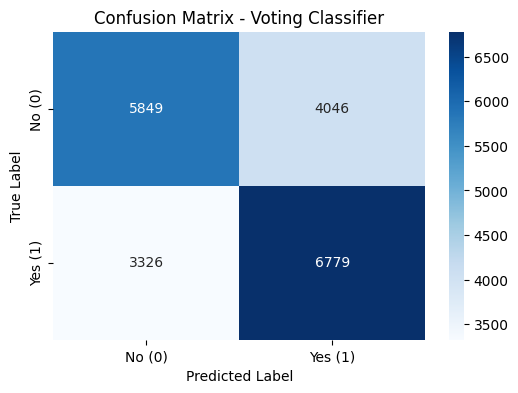

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

voting_model = VotingClassifier(
    estimators=[
        ('lgbm', LGBMClassifier(
            n_estimators=800, learning_rate=0.0359, max_depth=7, num_leaves=20,
            reg_alpha=1.0, reg_lambda=0.5, random_state=42)
        ),
        ('xgb', XGBClassifier(
            n_estimators=800, learning_rate=0.0359, max_depth=5,
            reg_alpha=1.0, reg_lambda=0.25, random_state=42)
        )
    ],
    voting='soft'  # Soft voting averages probabilities
)

voting_model.fit(X_train_tf, y_train)

# Evaluate Voting Classifier model
y_valid_pred_voting = voting_model.predict(X_valid_tf)
print("Voting Classifier Accuracy:", accuracy_score(y_valid, y_valid_pred_voting))
print("Voting Classifier - Classification Report:")
print(classification_report(y_valid, y_valid_pred_voting))


# Compute Confusion Matrix for Voting Classifier
cm_voting = confusion_matrix(y_valid, y_valid_pred_voting)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Voting Classifier")
plt.show()


**Explanation :**  Slight Improvement over Individual Models. 
Precision (0.64, 0.63) - Lower false positives compared to XGBoost.
Recall (0.59, 0.67) - Improved detection of malware cases (Class 1).
Better recall than XGBoost & LightGBM - More malware cases detected.
Slightly fewer false positives than tuned XGBoost.


Voting Classifier - Soft Voting (probability averaging) performs better than individual models.
More stable than XGBoost & LightGBM alone. Ensembling reduces model weaknesses by combining strengths of both.

## Stacking Classifier

Stacking Classifier Accuracy: 0.63075
Voting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      9895
           1       0.63      0.67      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



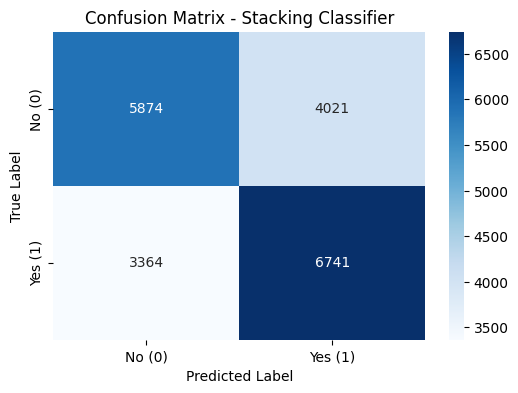

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

stack_model = StackingClassifier(
    estimators=[
        ('lgbm', LGBMClassifier(
            n_estimators=800, learning_rate=0.0359, max_depth=7, 
            reg_alpha=1.0, reg_lambda=0.5, random_state=42)
        ),
        ('xgb', XGBClassifier(
            n_estimators=800, learning_rate=0.0359, max_depth=5,
            reg_alpha=1.0, reg_lambda=0.25, random_state=42)
        )
    ],
     final_estimator= LogisticRegression(),
    # passthrough=True  # Allows original features + base model outputs used as features
)

stack_model.fit(X_train_tf, y_train)

# Evaluate Stacking Classifier model
y_valid_pred_stack = stack_model.predict(X_valid_tf)
print("Stacking Classifier Accuracy:", accuracy_score(y_valid, y_valid_pred_stack))
print("Voting Classifier - Classification Report:")
print(classification_report(y_valid, y_valid_pred_stack))

# Compute Confusion Matrix for Stacking Classifier
cm_stack = confusion_matrix(y_valid, y_valid_pred_stack)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Blues", xticklabels=["No (0)", "Yes (1)"], yticklabels=["No (0)", "Yes (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()


**Explanation :** Accuracy is slightly lower than Voting Classifier (0.6314) but comparable. More stable than individual models. Recall for Class 1 (malware cases) is 0.67, which means Stacking captures malware cases well. Precision for Class 1 is 0.63, meaning it maintains balance between precision and recall. Slightly higher false negatives (3364 vs. 3326 in Voting). Better recall but slightly worse precision.


* Base models (LightGBM, XGBoost) make predictions first.
* Logistic Regression (meta-model) learns from these predictions to refine final output.

## ROC Curve of Voting and Stacking

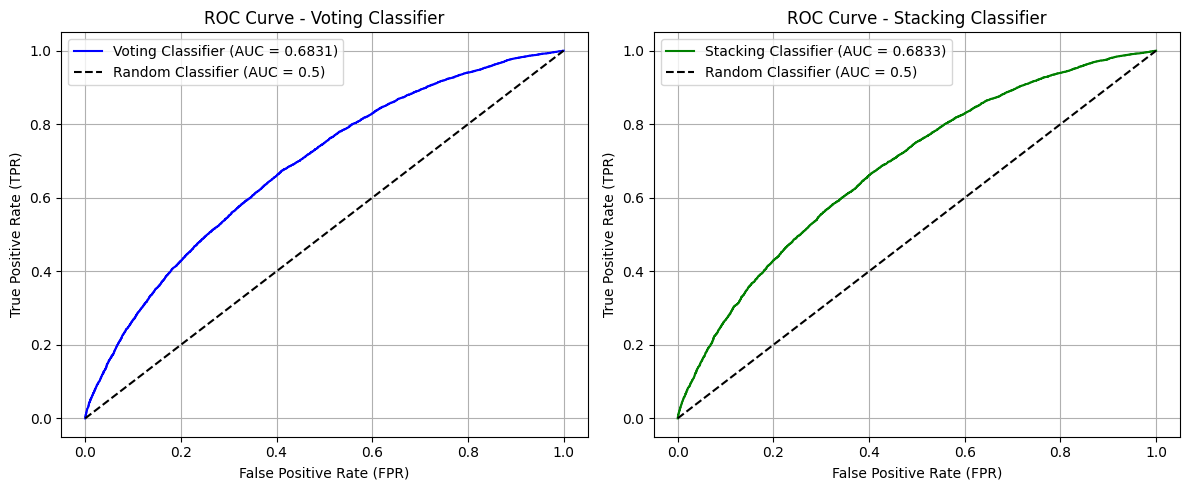

In [37]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities (for class 1)
y_valid_probs_voting = voting_model.predict_proba(X_valid_tf)[:, 1]  # Voting Classifier
y_valid_probs_stack = stack_model.predict_proba(X_valid_tf)[:, 1]    # Stacking Classifier

# Compute ROC Curve
fpr_voting, tpr_voting, _ = roc_curve(y_valid, y_valid_probs_voting)
fpr_stack, tpr_stack, _ = roc_curve(y_valid, y_valid_probs_stack)

# Compute AUC Scores (Area Under Curve)
auc_voting = auc(fpr_voting, tpr_voting)
auc_stack = auc(fpr_stack, tpr_stack)

# Create Side-by-Side Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot ROC for Voting Classifier
axes[0].plot(fpr_voting, tpr_voting, label=f"Voting Classifier (AUC = {auc_voting:.4f})", color='blue')
axes[0].plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")
axes[0].set_xlabel("False Positive Rate (FPR)")
axes[0].set_ylabel("True Positive Rate (TPR)")
axes[0].set_title("ROC Curve - Voting Classifier")
axes[0].legend()
axes[0].grid()

# Plot ROC for Stacking Classifier
axes[1].plot(fpr_stack, tpr_stack, label=f"Stacking Classifier (AUC = {auc_stack:.4f})", color='green')
axes[1].plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")
axes[1].set_xlabel("False Positive Rate (FPR)")
axes[1].set_ylabel("True Positive Rate (TPR)")
axes[1].set_title("ROC Curve - Stacking Classifier")
axes[1].legend()
axes[1].grid()

#  Show the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


**Explanation :** 
* ROC (Receiver Operating Characteristic) curves measure the model's performance  across all possible classification thresholds.
* Instead of using a fixed threshold (like 0.5),  ROC checks performance at different probability cutoffs .
* Higher TPR + Lower FPR = Better Model.
* ROC helps  visualize trade-offs between catching malware vs. avoiding false alarms.
* AUC (Area Under the Curve) measures how well the model separates malware-infected vs. clean systems.
* Higher AUC = Better model

Both classifiers (Voting & Stacking) have nearly identical AUC values (~0.683). Both outperform random guessing (AUC > 0.5), indicating meaningful predictive capability. Stacking Classifier has a marginally higher AUC than Voting Classifier, but the difference is negligible.

# Comparison of Model Accuracies

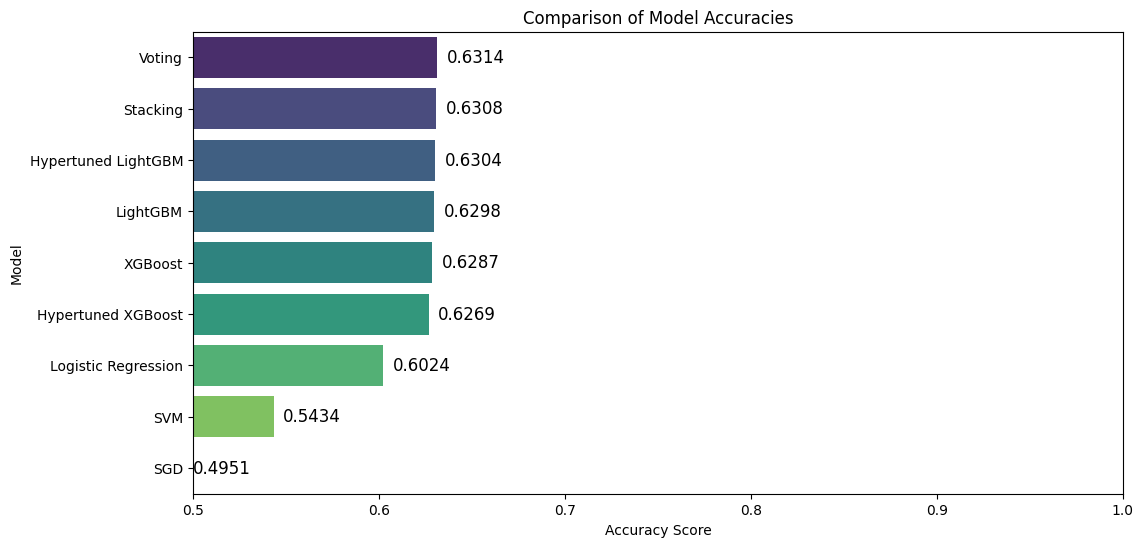

In [38]:
# Store model names & their accuracy scores
model_names = [
    "Logistic Regression", "SGD","SVM", "LightGBM", "XGBoost",
    "Hypertuned LightGBM", "Hypertuned XGBoost", "Voting", "Stacking", 
]

accuracy_scores = [
    accuracy_score(y_valid, y_pred_lr),
    accuracy_score(y_valid, y_pred_sgd),
    accuracy_score(y_valid, y_pred_svm),
    accuracy_score(y_valid, y_pred_lgbm),
    accuracy_score(y_valid, y_pred_xgb),
    accuracy_score(y_valid, y_valid_pred_tuned_lgbm),
    accuracy_score(y_valid, y_valid_pred_tuned_xgb),
    accuracy_score(y_valid, y_valid_pred_voting),
    accuracy_score(y_valid, y_valid_pred_stack)
]

# Create a DataFrame for better visualization
df_accuracy = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Sort models by accuracy
df_accuracy = df_accuracy.sort_values(by="Accuracy", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Accuracy", y="Model", data=df_accuracy, palette="viridis")

# Annotate bars with accuracy values
for index, value in enumerate(df_accuracy["Accuracy"]):
    plt.text(value + 0.005, index, f"{value:.4f}", va="center", fontsize=12)

plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Comparison of Model Accuracies")
plt.xlim(0.5, 1)  # Adjust x-axis for better visibility
plt.show()

**Key Insights**:

* Ensemble models (Voting & Stacking) performed the best - Combining multiple models boosted performance.
* LightGBM & XGBoost were strong individually - LightGBM was slightly better due to handling categorical features well.
* Hyperparameter tuning had minor impact - Ensembling mattered more.
* Linear models (Logistic Regression, SVM, SGD) performed poorly - They failed to capture complex relationships in the dataset.


# Final Model Selection & Submission

In [39]:
# Using Stacking as the final model (Kaggle test data acc. score is more than Voting)
best_model = stack_model   
best_model.fit(X_train_tf, y_train)
y_test_pred = best_model.predict(X_test_tf)

submission = pd.DataFrame({'id': range(test.shape[0]), 'target': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Final submission file created!")


Final submission file created!
